In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn_pandas import DataFrameMapper, cross_val_score
import sklearn
import datetime


In [2]:
av_test = pd.read_csv('C:\\Users\\alienware\\Downloads\\Test_wyCirpO.csv')
av_train = pd.read_csv('C:\\Users\\alienware\\Downloads\\Train_pjb2QcD.csv')

## Basic Data Exploration

In [3]:
print(av_test.shape)
print(av_train.shape)
print((av_train.shape[0]-av_train.count(axis=0))*100/av_train.shape[0])
print((av_test.shape[0]-av_test.count(axis=0))*100/av_test.shape[0])
print(av_train.dtypes)



(5045, 22)
(9527, 23)
ID                              0.000000
Office_PIN                      0.000000
Application_Receipt_Date        0.000000
Applicant_City_PIN              1.018159
Applicant_Gender                0.703264
Applicant_BirthDate             0.766243
Applicant_Marital_Status        0.766243
Applicant_Occupation           12.816207
Applicant_Qualification         0.902698
Manager_DOJ                     7.169098
Manager_Joining_Designation     7.169098
Manager_Current_Designation     7.169098
Manager_Grade                   7.169098
Manager_Status                  7.169098
Manager_Gender                  7.169098
Manager_DoB                     7.169098
Manager_Num_Application         7.169098
Manager_Num_Coded               7.169098
Manager_Business                7.169098
Manager_Num_Products            7.169098
Manager_Business2               7.169098
Manager_Num_Products2           7.169098
Business_Sourced                0.000000
dtype: float64
ID                  

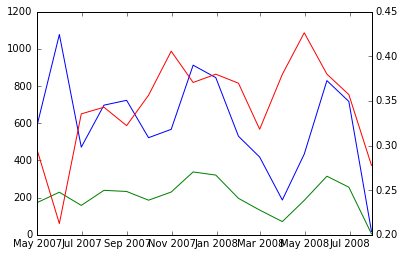

In [5]:
train_trchk=pd.DataFrame(av_train.Business_Sourced.values, index=pd.to_datetime
                         (av_train.Application_Receipt_Date).values, columns=['DV'])
train_trchk_grpd_count = train_trchk.groupby([pd.TimeGrouper('M')]).count()
train_trchk_grpd_sum = train_trchk.groupby([pd.TimeGrouper('M')]).sum()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(train_trchk_grpd_sum.index,train_trchk_grpd_sum.DV, color='g')
ax1.plot(train_trchk_grpd_count.index,train_trchk_grpd_count.DV, color='b')
ax2.plot(train_trchk_grpd_count.index,train_trchk_grpd_sum.DV/train_trchk_grpd_count.DV, color='r')

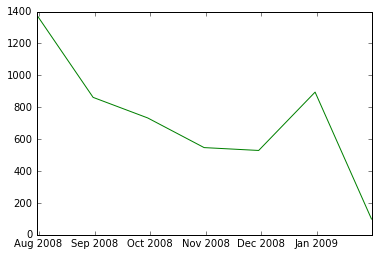

In [27]:
test_trchk=pd.DataFrame(av_test.ID.values, index=pd.to_datetime
                         (av_test.Application_Receipt_Date).values, columns=['DV'])
test_trchk_grpd_count = test_trchk.groupby([pd.TimeGrouper('M')]).count()
plt.plot(test_trchk_grpd_count.index,test_trchk_grpd_count.DV, color='g')

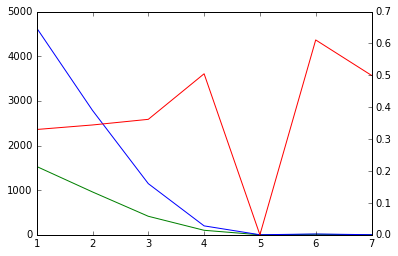

In [32]:
train_trchk=pd.DataFrame(av_train[ds_tr.Manager_Joining_Designation != 'Other'].Business_Sourced.values
                         , index=(av_train[ds_tr.Manager_Joining_Designation != 'Other'].Manager_Joining_Designation
                                                                  .apply(lambda x: (str(x).replace('Level ','')))
                                                                  .astype('float')).values, columns=['DV'])
train_trchk_grpd_count = train_trchk.groupby([train_trchk.index]).count()
train_trchk_grpd_sum = train_trchk.groupby([train_trchk.index]).sum()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(train_trchk_grpd_sum.index,train_trchk_grpd_sum.DV, color='g')
ax1.plot(train_trchk_grpd_count.index,train_trchk_grpd_count.DV, color='b')
ax2.plot(train_trchk_grpd_count.index,train_trchk_grpd_sum.DV/train_trchk_grpd_count.DV, color='r')

In [29]:
pd.to_datetime(av_train.Application_Receipt_Date)<

SyntaxError: invalid syntax (<ipython-input-29-212e707547fe>, line 1)

In [6]:
pd.to_datetime(av_test.Application_Receipt_Date)

0      2008-07-02
1      2008-07-02
2      2008-07-02
3      2008-07-02
4      2008-07-02
5      2008-07-02
6      2008-07-02
7      2008-07-02
8      2008-07-02
9      2008-07-02
10     2008-07-03
11     2008-07-03
12     2008-07-03
13     2008-07-03
14     2008-07-03
15     2008-07-03
16     2008-07-03
17     2008-07-03
18     2008-07-03
19     2008-07-03
20     2008-07-03
21     2008-07-03
22     2008-07-03
23     2008-07-03
24     2008-07-03
25     2008-07-03
26     2008-07-03
27     2008-07-03
28     2008-07-03
29     2008-07-03
          ...    
5015   2009-01-01
5016   2009-01-01
5017   2009-01-01
5018   2009-01-01
5019   2009-01-01
5020   2009-01-01
5021   2009-01-01
5022   2009-01-01
5023   2009-01-01
5024   2009-01-01
5025   2009-01-01
5026   2009-01-01
5027   2009-01-01
5028   2009-01-01
5029   2009-01-01
5030   2009-01-01
5031   2009-01-01
5032   2009-01-01
5033   2009-01-01
5034   2009-01-01
5035   2009-01-01
5036   2009-01-01
5037   2009-01-01
5038   2009-01-01
5039   200

### Feature Creation

In [7]:
ds_tr = av_train.copy()
ds_ts = av_test.copy()
ds_ts['Business_Sourced'] = 0

In [8]:
ds_tr['Applicant_Age'] = (pd.to_datetime(ds_tr.Application_Receipt_Date) - pd.to_datetime(ds_tr.Applicant_BirthDate)).astype('timedelta64[Y]')
ds_ts['Applicant_Age'] = (pd.to_datetime(ds_ts.Application_Receipt_Date) - pd.to_datetime(ds_ts.Applicant_BirthDate)).astype('timedelta64[Y]')

ds_tr['Manager_Exp'] = (pd.to_datetime(ds_tr.Application_Receipt_Date) - pd.to_datetime(ds_tr.Manager_DOJ)).astype('timedelta64[Y]')
ds_ts['Manager_Exp'] = (pd.to_datetime(ds_ts.Application_Receipt_Date) - pd.to_datetime(ds_ts.Manager_DOJ)).astype('timedelta64[Y]')

ds_tr['Manager_Age'] = (pd.to_datetime(ds_tr.Application_Receipt_Date) - pd.to_datetime(ds_tr.Manager_DoB)).astype('timedelta64[Y]')
ds_ts['Manager_Age'] = (pd.to_datetime(ds_ts.Application_Receipt_Date) - pd.to_datetime(ds_ts.Manager_DoB)).astype('timedelta64[Y]')


In [9]:
ds_tr.loc[ds_tr.Manager_Joining_Designation == 'Other', 'Manager_Joining_Designation'] = '0'
ds_tr['Manager_Promotion'] = ds_tr.Manager_Current_Designation.apply(lambda x: (str(x).replace('Level ',''))).astype('float') \
- ds_tr.Manager_Joining_Designation.apply(lambda x: (str(x).replace('Level ',''))).astype('float')
ds_ts.loc[ds_ts.Manager_Joining_Designation == 'Other', 'Manager_Joining_Designation'] = '0'
ds_ts['Manager_Promotion'] = ds_ts.Manager_Current_Designation.apply(lambda x: (str(x).replace('Level ',''))).astype('float')\
- ds_ts.Manager_Joining_Designation.apply(lambda x: (str(x).replace('Level ',''))).astype('float')

In [10]:
ds_tr.index = pd.to_datetime(ds_tr.Application_Receipt_Date).values
ds_tr=ds_tr[['Office_PIN','Applicant_Gender', 'Applicant_Age','Applicant_Marital_Status','Applicant_Occupation'
       ,'Applicant_Qualification','Manager_Joining_Designation','Manager_Current_Designation',
       'Manager_Grade', 'Manager_Status', 'Manager_Gender','Manager_Num_Application', 'Manager_Num_Coded', 'Manager_Business',
      'Manager_Num_Products', 'Manager_Business2', 'Manager_Num_Products2', 'Manager_Exp', 'Manager_Age','Manager_Promotion'
      ,'Business_Sourced']]
ds_ts.index = pd.to_datetime(ds_ts.Application_Receipt_Date).values
ds_ts=ds_ts[['Office_PIN','Applicant_Gender', 'Applicant_Age','Applicant_Marital_Status','Applicant_Occupation'
       ,'Applicant_Qualification','Manager_Joining_Designation','Manager_Current_Designation',
       'Manager_Grade', 'Manager_Status', 'Manager_Gender','Manager_Num_Application', 'Manager_Num_Coded', 'Manager_Business',
      'Manager_Num_Products', 'Manager_Business2', 'Manager_Num_Products2', 'Manager_Exp', 'Manager_Age','Manager_Promotion'
      ,'Business_Sourced']]


In [11]:
target_col = ['Business_Sourced']
num_cols = ['Manager_Num_Application', 'Manager_Num_Coded', 'Manager_Business',
      'Manager_Num_Products', 'Manager_Business2', 'Manager_Num_Products2', 'Manager_Exp', 'Manager_Age','Manager_Promotion',
          'Applicant_Age']
cat_cols = list(set(ds_ts.columns) - set(target_col) - set(num_cols))
cat_cols

['Manager_Gender',
 'Applicant_Marital_Status',
 'Applicant_Qualification',
 'Office_PIN',
 'Manager_Current_Designation',
 'Applicant_Gender',
 'Applicant_Occupation',
 'Manager_Joining_Designation',
 'Manager_Status',
 'Manager_Grade']

In [12]:
ds_tr_1=ds_tr.copy()
ds_ts_1=ds_ts.copy()


cat_dummy_cols = {}
for col in cat_cols:
    ds_tr_1 = pd.concat([pd.get_dummies(ds_tr_1[col], prefix=col, dummy_na=False),ds_tr_1], axis=1)
    cat_dummy_cols[col] = pd.get_dummies(ds_tr_1[col], prefix=col, dummy_na=False).columns

    
for col in cat_cols:
    ds_ts_1 = pd.concat([pd.get_dummies(ds_ts_1[col], prefix=col, dummy_na=False),ds_ts_1], axis=1)

In [13]:
cat_dummy_cols_dropped = []
for head in cat_dummy_cols:
    for dummy in cat_dummy_cols[head]:
        if (ds_tr_1[dummy].sum())<=30:
            cat_dummy_cols_dropped.append(dummy)
            
cat_dummy_cols_dropped

['Applicant_Marital_Status_D',
 'Applicant_Marital_Status_W',
 'Manager_Grade_1.0',
 'Manager_Grade_7.0',
 'Manager_Grade_8.0',
 'Manager_Grade_9.0',
 'Manager_Grade_10.0',
 'Applicant_Qualification_Associate / Fellow of Institute of Chartered Accountans of India',
 'Applicant_Qualification_Associate/Fellow of Acturial Society of India',
 'Applicant_Qualification_Associate/Fellow of Institute of Company Secretories of India',
 'Applicant_Qualification_Associate/Fellow of Insurance Institute of India',
 'Applicant_Qualification_Certified Associateship of Indian Institute of Bankers',
 'Applicant_Qualification_Professional Qualification in Marketing',
 'Office_PIN_110034',
 'Office_PIN_124001',
 'Office_PIN_143001',
 'Office_PIN_144001',
 'Office_PIN_282001',
 'Office_PIN_313001',
 'Office_PIN_334002',
 'Office_PIN_395001',
 'Office_PIN_423203',
 'Office_PIN_444001',
 'Office_PIN_517503',
 'Office_PIN_620018',
 'Office_PIN_625016',
 'Office_PIN_636004',
 'Office_PIN_641018',
 'Office_PIN

In [14]:
features=list(set(ds_tr_1.columns) - set(cat_cols) - set(cat_dummy_cols_dropped) - set(target_col))
ds_tr_2=ds_tr_1[list(set(features) | set(target_col))]
ds_ts_2=ds_ts_1[list((set(features) & set(ds_ts_1.columns)) | set(target_col))]

for col in set(features) - (set(features) & set(ds_ts_1.columns)):
    ds_ts_2[col] = 0

C:\WinPython-64bit-3.4.4.1\python-3.4.4.amd64\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [15]:
dt=((ds_tr_2.shape[0]-ds_tr_2.count(axis=0))*100/ds_tr_2.shape[0])
dt[dt.values>0].index

Index(['Manager_Num_Coded', 'Manager_Exp', 'Manager_Num_Products',
       'Manager_Promotion', 'Applicant_Age', 'Manager_Business',
       'Manager_Num_Application', 'Manager_Business2', 'Manager_Num_Products2',
       'Manager_Age'],
      dtype='object')

In [16]:
ds_tr_2['Applicant_Age'].fillna(ds_tr_2['Applicant_Age'].mean(), inplace=True)
ds_ts_2['Applicant_Age'].fillna(ds_tr_2['Applicant_Age'].mean(), inplace=True)

dt=((ds_tr_2.shape[0]-ds_tr_2.count(axis=0))*100/ds_tr_2.shape[0])
dt[dt.values>0].index

C:\WinPython-64bit-3.4.4.1\python-3.4.4.amd64\lib\site-packages\pandas\core\generic.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Index(['Manager_Num_Coded', 'Manager_Exp', 'Manager_Num_Products',
       'Manager_Promotion', 'Manager_Business', 'Manager_Num_Application',
       'Manager_Business2', 'Manager_Num_Products2', 'Manager_Age'],
      dtype='object')

In [17]:
ds_tr_WMan = ds_tr_2.dropna().copy()


In [18]:
features_WoutMan = list(set(features) - set(dt[dt.values>0].index))
ds_tr_WoutMan = ds_tr_2[list(set(features_WoutMan) | set(target_col))]

In [19]:
train_WMan = ds_tr_WMan.ix[ds_tr_WMan.index<datetime.datetime(2008,2,1)]
test_WMan = ds_tr_WMan.ix[ds_tr_WMan.index>=datetime.datetime(2008,2,1)]


In [20]:
print((ds_ts_2).shape)
ds_ts_2['ID'] = av_test.ID.values


(5045, 126)


C:\WinPython-64bit-3.4.4.1\python-3.4.4.amd64\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [21]:
ds_ts_2_WMan = ds_ts_2[~pd.isnull(ds_ts_2.Manager_Business2).values]
ds_ts_2_WoutMan = ds_ts_2[pd.isnull(ds_ts_2.Manager_Business2).values]

In [22]:
ds_ts_2_WoutMan.shape

(824, 127)

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegressionCV

gbm_WMan = LogisticRegressionCV()

gbm_WMan_fit = gbm_WMan.fit(ds_tr_WMan[features].values, ds_tr_WMan[target_col].T.values[0])

gbm_WoutMan = GradientBoostingClassifier()

gbm_WoutMan_fit = gbm_WoutMan.fit(ds_tr_2[features_WoutMan].values, ds_tr_2[target_col].T.values[0])


ts_WMan = pd.DataFrame([ds_ts_2_WMan.ID.values,gbm_WMan_fit.predict_proba(ds_ts_2_WMan[features]).T[1]]).T

ts_WoutMan = pd.DataFrame([ds_ts_2_WoutMan.ID.values,gbm_WoutMan_fit.predict_proba(ds_ts_2_WoutMan[features_WoutMan]).T[1]]).T


ts_WMan.append([ts_WoutMan]).to_csv('F:\\tst.csv')


In [23]:
from sklearn import metrics
def scorer(estimator, X, y):
    status = estimator.predict_proba(X)
    fpr, tpr, _ = metrics.roc_curve(y, status[:,1])
    return(metrics.auc(fpr, tpr))
    

In [ ]:
from sklearn.grid_search import GridSearchCV

param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6],
              'min_samples_leaf': [3, 5, 9, 17],
              # 'max_features': [1.0, 0.3, 0.1] ## not possible in our example (only 1 fx)
              }

param_grid_test = {
              'n_estimators': [3, 5, 9],
              # 'max_features': [1.0, 0.3, 0.1] ## not possible in our example (only 1 fx)
              }

gbm_WMan = GradientBoostingClassifier()
gbm_WManCV_fit = GridSearchCV(gbm_WMan, param_grid_test, scoring=scorer, n_jobs=4)\
.fit(ds_tr_WMan[features].values, ds_tr_WMan[target_col].T.values[0])

#gbm_WoutMan = GradientBoostingClassifier(n_estimators=300)
#gbm_WoutManCV_fit = GridSearchCV(gbm_WoutMan, param_grid, n_jobs=4).fit(ds_tr_WoutMan[features_WoutMan].values, ds_tr_WoutMan[target_col].T.values[0])


In [180]:
(ds_tr_WMan[target_col])

0       (B, u, s, i, n, e, s, s, _, S, o, u, r, c, e, d)
1       (B, u, s, i, n, e, s, s, _, S, o, u, r, c, e, d)
2       (B, u, s, i, n, e, s, s, _, S, o, u, r, c, e, d)
3       (B, u, s, i, n, e, s, s, _, S, o, u, r, c, e, d)
4       (B, u, s, i, n, e, s, s, _, S, o, u, r, c, e, d)
5       (B, u, s, i, n, e, s, s, _, S, o, u, r, c, e, d)
6       (B, u, s, i, n, e, s, s, _, S, o, u, r, c, e, d)
7       (B, u, s, i, n, e, s, s, _, S, o, u, r, c, e, d)
8       (B, u, s, i, n, e, s, s, _, S, o, u, r, c, e, d)
9       (B, u, s, i, n, e, s, s, _, S, o, u, r, c, e, d)
10      (B, u, s, i, n, e, s, s, _, S, o, u, r, c, e, d)
11      (B, u, s, i, n, e, s, s, _, S, o, u, r, c, e, d)
12      (B, u, s, i, n, e, s, s, _, S, o, u, r, c, e, d)
13      (B, u, s, i, n, e, s, s, _, S, o, u, r, c, e, d)
14      (B, u, s, i, n, e, s, s, _, S, o, u, r, c, e, d)
15      (B, u, s, i, n, e, s, s, _, S, o, u, r, c, e, d)
16      (B, u, s, i, n, e, s, s, _, S, o, u, r, c, e, d)
17      (B, u, s, i, n, e, s, s

In [74]:
## Do not run
for col in dt[dt.values>0].index:
    ds_tr_2[col].fillna(ds_tr_2[col].mean(), inplace=True)
    ds_ts_2[col].fillna(ds_tr_2[col].mean(), inplace=True)

C:\WinPython-64bit-3.4.4.1\python-3.4.4.amd64\lib\site-packages\pandas\core\generic.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [75]:
train_1 = ds_tr_2.ix[ds_tr_2.index<datetime.datetime(2008,2,1)]
test_1 = ds_tr_2.ix[ds_tr_2.index>=datetime.datetime(2008,2,1)]


In [76]:
print(train_1.shape)
print((test_1).shape)

(6924, 126)
(2603, 126)


In [77]:
train_1[target_col].values.reshape(len(train_1[target_col]),)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier()

gbm_fit = gbm.fit(train_1[features].values, train_1[target_col].values.reshape(len(train_1[target_col]),))

from sklearn import metrics

print(metrics.accuracy_score(train_1[target_col].values.reshape(len(train_1[target_col]),), gbm_fit.predict(train_1[features].values)))

print(metrics.accuracy_score(test_1[target_col].values.reshape(len(test_1[target_col]),), gbm_fit.predict(test_1[features].values)))

#sum((test_1[target_col].values.reshape(len(test_1[target_col]),))-gbm_fit.predict(test_1[features].values))

status = gbm_fit.predict_proba(train_1[features].values)
fpr, tpr, _ = metrics.roc_curve(train_1[target_col[0]].values, status[:,1])
print(metrics.auc(fpr, tpr))

status = gbm_fit.predict_proba(test_1[features].values)
fpr, tpr, _ = metrics.roc_curve(test_1[target_col[0]].values, status[:,1])
print(metrics.auc(fpr, tpr))

pd.DataFrame(gbm_fit.predict_proba(ds_ts_2[list(set(features) & set(ds_ts_2.columns))].values).T[1]).to_excel('F:\\tst.xlsx')








0.697429231658
0.614291202459
0.726346457711
0.571092637932


In [ ]:
plt.plot(fpr,tpr)